In [1]:
!pip install simpleaudio

     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ------- -------------------------------- 0.4/2.0 MB 11.6 MB/s eta 0:00:01
     ------------------- -------------------- 1.0/2.0 MB 12.6 MB/s eta 0:00:01
     ---------------------------- ----------- 1.5/2.0 MB 11.6 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-win_amd64.whl size=2039033 sha256=2baac7411fcf00eaf9aa84e26cd28714f20083d724597389b353fb5fef2965ed
  Stored in directory: c:\users\boris\appdata\local\pip\cache\wheels\44\74\11\9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


302.38105197476955
359.59369845040356
[[    0     0]
 [  280     0]
 [  559     0]
 ...
 [-3452     0]
 [-3828     0]
 [-4194     0]]


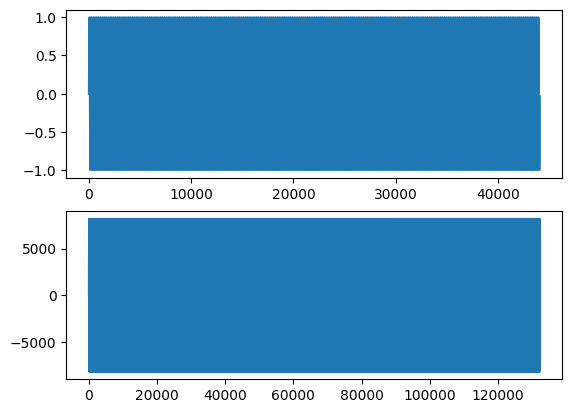

In [4]:
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
# calculate note frequencies Hertz
A_freq = 240
Csh_freq = A_freq * 2 ** (4 / 12)

E_freq = A_freq * 2 ** (7 / 12)
print(Csh_freq)
print(E_freq)

# get timesteps for each sample, T is note duration in seconds
sample_rate = 44100
T = 1.0
t = np.linspace(0, T, int(T * sample_rate), False)

# generate sine wave notes
A_note = np.sin(A_freq * t * 2 * np.pi)
Csh_note = np.sin(Csh_freq * t * 2 * np.pi)
E_note = np.sin(E_freq * t * 2 * np.pi)

plt.subplot(211)
plt.plot(A_note)

# concatenate notes
audio = np.hstack((A_note, Csh_note,E_note))
#print(audio)

# normalize audio to desired volume (0.5 is half volume)
volume = 0.5
audio *= volume

# normalize to 16-bit range
audio *= 32767 / 1 * np.max(np.abs(audio))
plt.subplot(212)
#print(audio)
# convert to 16-bit data
audio = audio.astype(np.int16)

# create stereo signal with zeros
stereo_signal = np.zeros([int(sample_rate*T*3),2],dtype=np.int16)   


###CHANGE HERE FOR 0 = right, 1 = left
stereo_signal[:,0] = audio[:]
print(stereo_signal)

#print(audio2)
plt.plot(audio)
# start playback
play_obj = sa.play_buffer(stereo_signal, 2, 2, sample_rate)

#plt.show()
# wait for playback to finish before exiting
play_obj.wait_done()